<a href="https://colab.research.google.com/github/AtreyeeDas/AIML_minor_Task1/blob/main/AIML_minor_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from google.colab import drive

In [2]:
# Mount Google Drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Dataset Processing
# Load the dataset
train_data_path = '/content/gdrive/MyDrive/aiml_minor_project_sem3/train.csv'
test_data_path = '/content/gdrive/MyDrive/aiml_minor_project_sem3/test.csv'
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [ ]:
# Separate features and labels
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

In [ ]:
# Normalize the pixel values (0-255) to (0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Reshape data to 28x28 images
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Model Architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization
    layers.Dropout(0.3),  # Dropout layer with 30% dropout rate
    layers.Dense(10, activation='softmax')  # Assuming 10 classes (0-9)
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Training the model on the train dataset
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.7288 - loss: 0.9073 - val_accuracy: 0.8581 - val_loss: 0.5219
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.8519 - loss: 0.5359 - val_accuracy: 0.8763 - val_loss: 0.4623
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.8609 - loss: 0.4911 - val_accuracy: 0.8839 - val_loss: 0.4364
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.8729 - loss: 0.4613 - val_accuracy: 0.8855 - val_loss: 0.4264
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.8806 - loss: 0.4350 - val_accuracy: 0.8878 - val_loss: 0.4146
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.8818 - loss: 0.4323 - val_accuracy: 0.8868 - val_loss: 0.4149
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.8851 - loss: 0.4162 - val_accuracy: 0.8896 - val_loss: 0.4060
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.8888 -

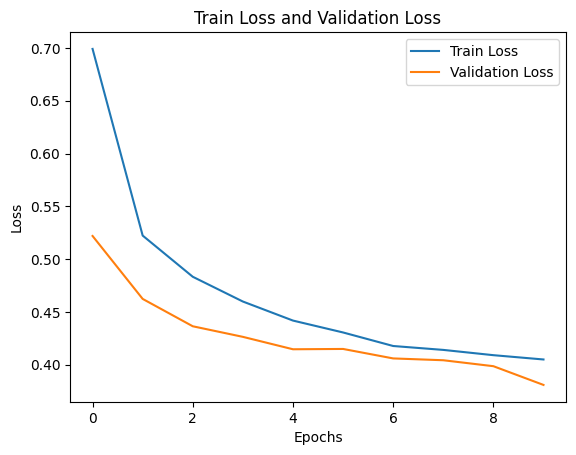

In [ ]:
# Plotting Train Loss and Validation Loss for each epoch
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train Loss and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Testing the model on the test dataset
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
# Calculation of the Test Accuracy, Precision, Recall and F-Measure
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f_measure = f1_score(y_test, y_pred_classes, average='weighted')

In [ ]:
print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F-Measure: {f_measure:.4f}')

Test Accuracy: 0.9000
Test Precision: 0.9006
Test Recall: 0.9000
Test F-Measure: 0.8985


<Figure size 1000x700 with 0 Axes>

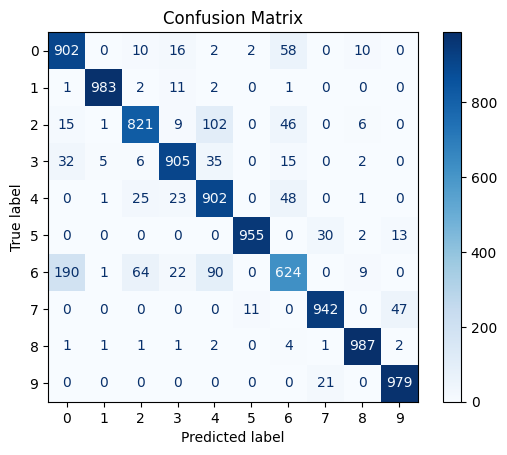

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()